# Challenge: Analyzing Text about Data Science

In this example, let's do a simple exercise that covers all steps of a traditional data science process. You do not have to write any code, you can just click on the cells below to execute them and observe the result. As a challenge, you are encouraged to try this code out with different data. 

## Goal

In this lesson, we have been discussing different concepts related to Data Science. Let's try to discover more related concepts by doing some **text mining**. We will start with a text about Data Science, extract keywords from it, and then try to visualize the result.

As a text, I will use the page on Data Science from Wikipedia:

In [148]:
url_DS = 'https://en.wikipedia.org/wiki/Data_science'
url_BD = 'https://en.wikipedia.org/wiki/Data_science'
url_ML = 'https://en.wikipedia.org/wiki/Big_data'

## Step 1: Getting the Data

First step in every data science process is getting the data. We will use `requests` library to do that:

In [149]:
import requests

text = requests.get(url_ML).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Big data - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"05c8b209-00e7-41a8-a197-602765a472f8","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Big_data","wgTitle":"Big data","wgCurRevisionId":1108626252,"wgRevisionId":1108626252,"wgArticleId":27051151,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["All articles with bare URLs for citations","Articles with bare URLs for citations from July 2022","Articles with PDF format bare URLs for citations","Webarchive templa

## Step 2: Transforming the Data

The next step is to convert the data into the form suitable for processing. In our case, we have downloaded HTML source code from the page, and we need to convert it into plain text.

There are many ways this can be done. We will use the simplest built-in [HTMLParser](https://docs.python.org/3/library/html.parser.html) object from Python. We need to subclass the `HTMLParser` class and define the code that will collect all text inside HTML tags, except `<script>` and `<style>` tags.

In [150]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Big data - Wikipedia Big data From Wikipedia, the free encyclopedia Jump to navigation Jump to search Information assets characterized by high volume, velocity, and variety This article is about large collections of data. For the band, see  Big Data (band) . For the practice of buying and selling of personal and consumer data, see  Surveillance capitalism . Non-linear growth of digital global information-storage capacity and the waning of analog storage [1] Big data  refers to  data sets  that are too large or complex to be dealt with by traditional  data-processing application software . Data with many fields (rows) offer greater  statistical power , while data with higher complexity (more attributes or columns) may lead to a higher  false discovery rate . [2]  Big data analysis challenges include  capturing data ,  data storage ,  data analysis , search,  sharing ,  transfer ,  visualization ,  querying , updating,  information privacy , and data source. Big data was originally asso

## Step 3: Getting Insights

The most important step is to turn our data into some form from which we can draw insights. In our case, we want to extract keywords from the text, and see which keywords are more meaningful.

We will use Python library called [RAKE](https://github.com/aneesha/RAKE) for keyword extraction. First, let's install this library in case it is not present: 

In [151]:
import sys
!{sys.executable} -m pip install nlp_rake

The main functionality is available from `Rake` object, which we can customize using some parameters. In our case, we will set the minimum length of a keyword to 5 characters, minimum frequency of a keyword in the document to 3, and maximum number of words in a keyword - to 2. Feel free to play around with other values and observe the result.

In [152]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('big data', 4.0),
 ('data sets', 4.0),
 ('machine learning', 4.0),
 ('latin america', 4.0),
 ('computer-aided diagnosis', 4.0),
 ('data flow', 4.0),
 ('scientific reports', 4.0),
 ('wayback machine', 4.0),
 ('washington post', 4.0),
 ('english version', 4.0),
 ('unsourced statements', 4.0),
 ('artificial intelligence', 3.909090909090909),
 ('predictive analytics', 3.8421052631578947),
 ('data collected', 3.769230769230769),
 ('business intelligence', 3.7552447552447554),
 ('^ kitchin', 3.7385057471264367),
 ('promotional source', 3.7142857142857144),
 ('citation needed', 3.7142857142857144),
 ('international journal', 3.7),
 ('cite journal', 3.7),
 ('york times', 3.6923076923076925),
 ('financial times', 3.6923076923076925),
 ('unstructured data', 3.625),
 ('structured data', 3.571428571428571),
 ('data analysis', 3.5),
 ('national archives', 3.4642857142857144),
 ('ontological characteristics', 3.4545454545454546),
 ('international development', 3.4210526315789473),
 ('marketing ana

In [153]:
def filter_strings(list,non_wanted_chars,subindex=None):
    filtered_list = []
    if subindex != None:
        for i in range(len(list)):
            if not any([char in list[i][subindex] for char in non_wanted_chars]):
                filtered_list.append(list[i])
    else:
        for i in range(len(list)):
            if not any([char in list[i] for char in non_wanted_chars]):
                filtered_list.append(list[i])
    return filtered_list

In [154]:
matches = [">","<","@","/","="]
filtered_res = filter_strings(res,matches,0)
print(len(res),len(filter_strings(res,matches,0)))

195 189



We obtained a list terms together with associated degree of importance. As you can see, the most relevant disciplines, such as machine learning and big data, are present in the list at top positions.

## Step 4: Visualizing the Result

People can interpret the data best in the visual form. Thus it often makes sense to visualize the data in order to draw some insights. We can use `matplotlib` library in Python to plot simple distribution of the keywords with their relevance:

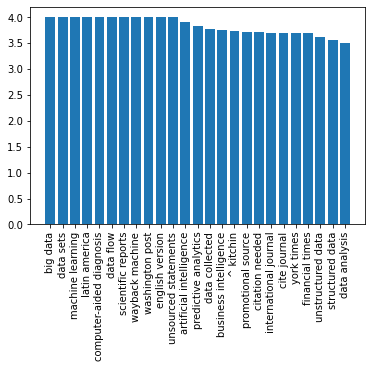

In [155]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(filtered_res[:25])

There is, however, even better way to visualize word frequencies - using **Word Cloud**. We will need to install another library to plot the word cloud from our keyword list.

In [156]:
!{sys.executable} -m pip install wordcloud

`WordCloud` object is responsible for taking in either original text, or pre-computed list of words with their frequencies, and returns and image, which can then be displayed using `matplotlib`:

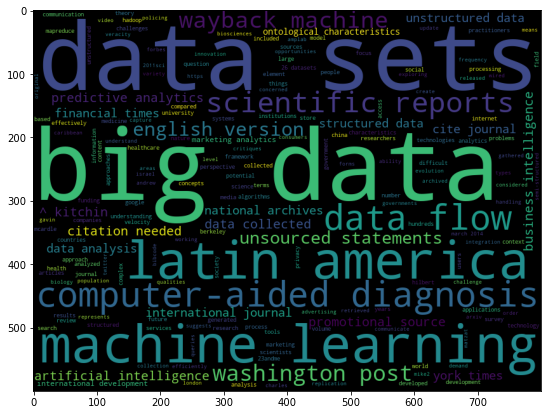

In [157]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='black',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in filtered_res }))
wc.generate_from_frequencies({ k:v for k,v in filtered_res }).to_file('images/ml_wordcloud.png')

We can also pass in the original text to `WordCloud` - let's see if we are able to get similar result:

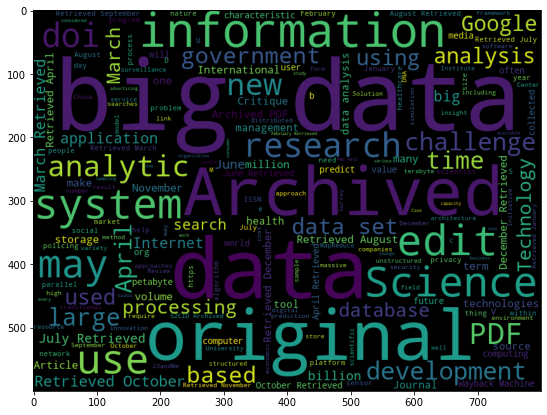

In [158]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [159]:
wc.generate(text).to_file('images/ml_wordcloud_raw.png')

You can see that word cloud now looks more impressive, but it also contains a lot of noise (eg. unrelated words such as `Retrieved on`). Also, we get fewer keywords that consist of two words, such as *data scientist*, or *computer science*. This is because RAKE algorithm does much better job at selecting good keywords from text. This example illustrates the importance of data pre-processing and cleaning, because clear picture at the end will allow us to make better decisions.

In this exercise we have gone through a simple process of extracting some meaning from Wikipedia text, in the form of keywords and word cloud. This example is quite simple, but it demonstrates well all typical steps a data scientist will take when working with data, starting from data acquisition, up to visualization.

In our course we will discuss all those steps in detail. 